In [4]:
import numpy as np 
import pandas as pd
#import tensorflow as tf
from tqdm import tqdm
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import os
image_path = os.path.join("data/Lung Segmentation/CXR_png")
mask_path = os.path.join("data/Lung Segmentation/masks/")

In [5]:
images = os.listdir(image_path)
mask = os.listdir(mask_path)
mask = [fName.split(".png")[0] for fName in mask]
image_file_name = [fName.split("_mask")[0] for fName in mask]

In [6]:
check = [i for i in mask if "mask" in i]
print("Total mask that has modified name : ", len(check))

Total mask that has modified name :  566


In [7]:
testing_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))
training_files = check

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    
    if flag == "test":
        for i in testing_files:
            im = cv2.resize(cv2.imread(os.path.join(image_path, i)), (X_shape, X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i)),(X_shape,X_shape))[:,:,0]   
            im_array.append(im)
            mask_array.append(mask)
        
        return im_array, mask_array
    
    if flag == "train":
        for i in training_files:
            im = cv2.resize(cv2.imread(os.path.join(image_path,i.split("_mask")[0]+".png")),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i+".png")),(X_shape,X_shape))[:,:,0]
            im_array.append(im)
            mask_array.append(mask)
            
        return im_array, mask_array

In [8]:
def plotMask(X,y):
    sample = []
    
    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)
        
    for i in range(0,6,3):
        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])
        
        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])
        
        
        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])
        
        plt.show()

In [9]:
dim = 64*2
X_train,y_train = getData(dim,flag="train")
X_test, y_test = getData(dim)

training set


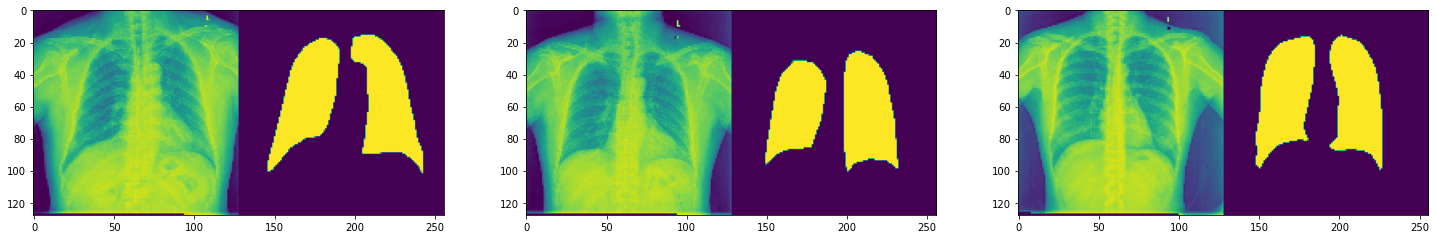

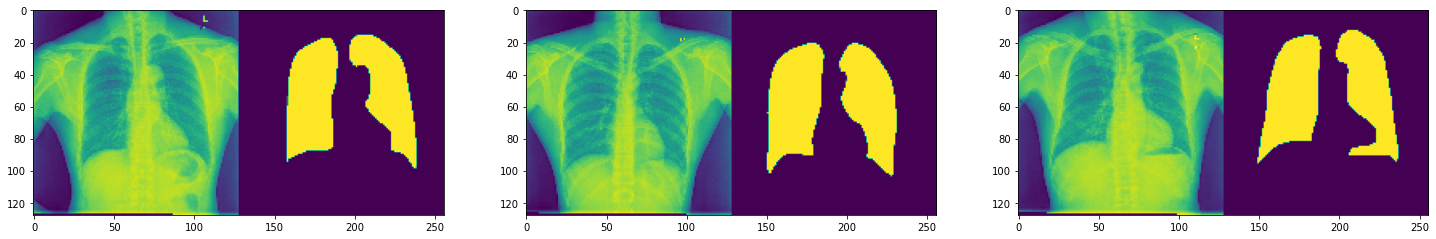

testing set


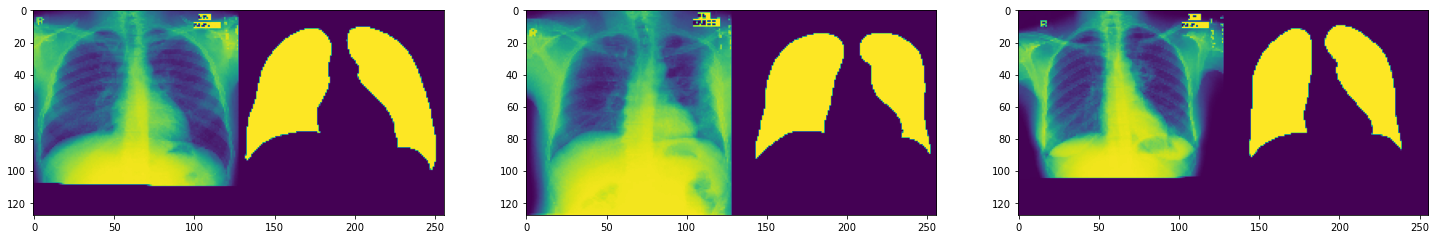

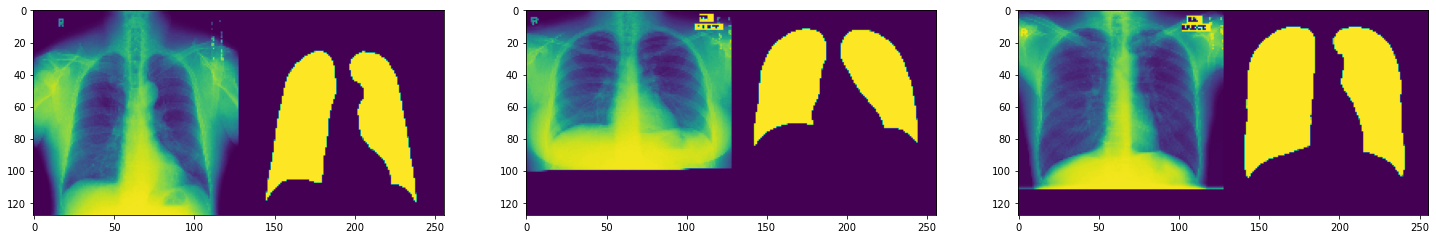

In [10]:
print("training set")
plotMask(X_train, y_train)
print("testing set")
plotMask(X_test, y_test)

In [11]:
!pip install jupyter_http_over_ws


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!jupyter serverextension enable --py jupyter_http_over_ws

Enabling: jupyter_http_over_ws
- Writing config: C:\Users\ADMIN\.jupyter
    - Validating...
      jupyter_http_over_ws 0.0.7 ok
